In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt

from code.evaluation import (compute_horizon_degradation_metrics,
                             plot_forecast_degradation,
                             plot_selected_horizons,
                             plot_forecast_trajectory,
                             compute_forecast_metrics)

from code.data_utils import clean_actual_data, clean_forecast_data

In [2]:
def plot_time_series(df, time_col='timestamp', value_col='load', title='Time Series Plot'):
    """
    Plots a time series using matplotlib.

    Parameters:
    - df: pandas DataFrame with at least two columns.
    - time_col: name of the column with datetime values.
    - value_col: name of the column with the values to plot.
    - title: title of the plot.
    """
    plt.figure(figsize=(12, 5))
    plt.plot(df[time_col], df[value_col], label=value_col, color='tab:blue')
    plt.xlabel('Time')
    plt.xticks(rotation=45)
    plt.ylabel(value_col.capitalize())
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.show()

In [3]:
def correct_data(df):
    """
    Corrects the data by removing outliers and interpolating missing values.

    Parameters:
    - df: pandas DataFrame with at least two columns: 'timestamp' and 'load'.

    Returns:
    - df: corrected pandas DataFrame.
    """
    # Remove outliers
    outlier_idx = df['load_diff'].abs().idxmax()
    df.loc[outlier_idx-2:outlier_idx+2, 'load'] = None
    df['load'] = df['load'].interpolate(method='linear')

    return df

In [4]:
df = pd.read_csv(r'../data/processed/actual_load.csv', parse_dates=['timestamp'])
forecast_df = pd.read_csv(r'../data/processed/forecast_load.csv', parse_dates=['issued_at', 'target_time'])

In [5]:
df['load_diff'] = df['load'].diff(periods=1)

In [6]:
outlier_idx = df['load_diff'].abs().idxmax()
display(df.loc[outlier_idx-2:outlier_idx+2])

,timestamp,load,load_diff
4451,2025-05-06 11:00:00,76948.3000,-4594.1844
4452,2025-05-06 11:05:01,78315.3800,1367.0800
4453,2025-05-06 11:10:00,82940.6000,4625.2200
4454,2025-05-06 11:15:00,83242.1641,301.5641
4455,2025-05-06 11:20:00,83374.1000,131.9359


In [7]:
df.loc[outlier_idx-2:outlier_idx+2, 'load'] = None
df['load'] = df['load'].interpolate(method='linear')

In [8]:
df.loc[outlier_idx-2:outlier_idx+2]

,timestamp,load,load_diff
4451,2025-05-06 11:00:00,81879.178667,-4594.1844
4452,2025-05-06 11:05:01,82215.872933,1367.0800
4453,2025-05-06 11:10:00,82552.567200,4625.2200
4454,2025-05-06 11:15:00,82889.261467,301.5641
4455,2025-05-06 11:20:00,83225.955733,131.9359


In [9]:
df['load_diff'] = df['load'].diff(periods=1)

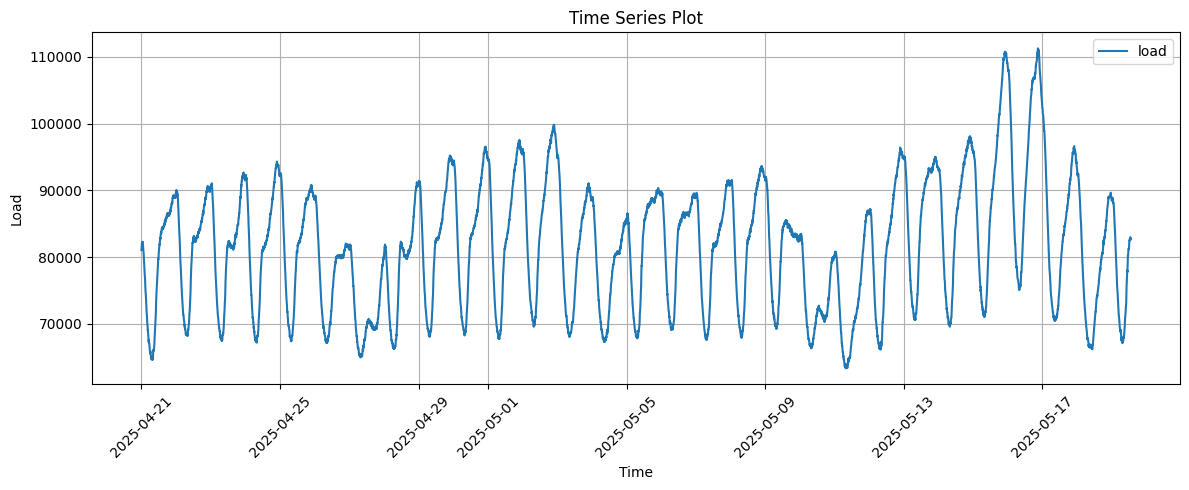

In [109]:
plot_time_series(df)

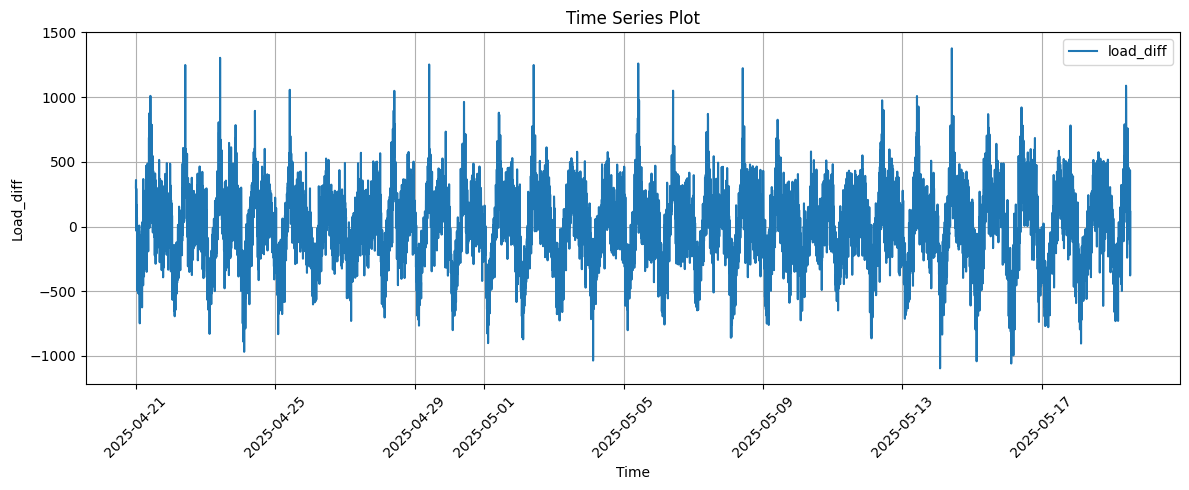

In [110]:
plot_time_series(df, value_col='load_diff')